# Starbucks drink data:
# *Wake up! Your caffeine fix could break your health*

<img src="https://i.ytimg.com/vi/ZGTTnPqjmeg/hqdefault.jpg"/>

## 1.0 Contents<a id='1.0'></a>
* [1.1 Introduction](#1.1)
* [1.2 Purpose](#1.2)
* [2.0 Data Overview](#2.0)
    * [2.1 Missing values](#2.1)
    * [2.2 Visualizing raw data](#2.2)
    * [2.3 Selecting from label options](#2.3)
    * [2.4 Correlations](#2.4)
    * [2.5 Plotting the focus variables](#2.5)
* [3.0 Recommendations](#3.0)
    * [3.1 Final recommendation list](#3.1)

#### 1.1 Introduction: <a id='1.1'></a>

America is fat. According to the latest available CDC data, the US obesity prevalence was 41.9% [1]. We are approaching a bariatric tipping point, and dietary decisions - whether conscious or otherwise - are a driving factor.

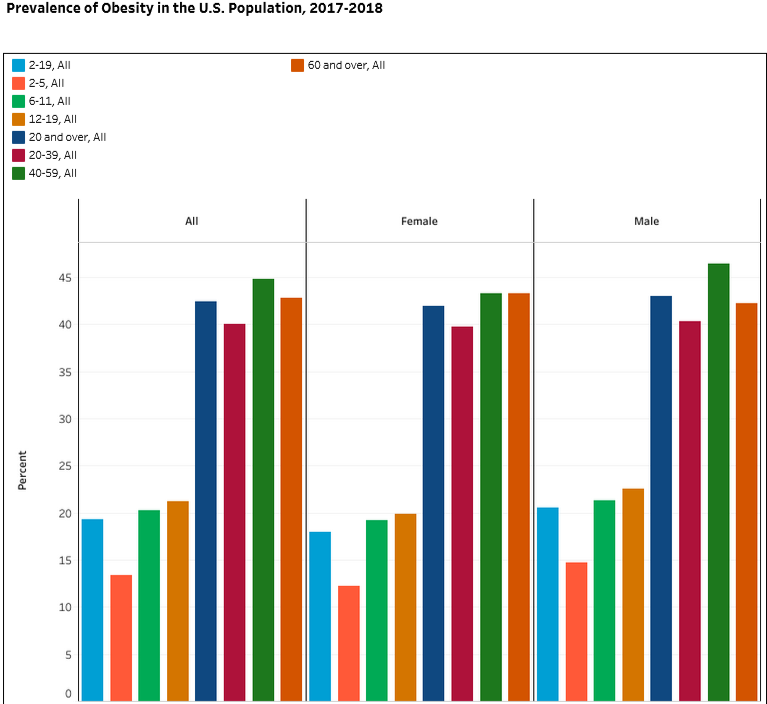

America is also wired. According to research, 85% of the U.S. population consumes at least one caffeinated beverage per day, the vast majority of which comes from coffee and tea (70-90%). Mean caffeine intake from coffee is ~200 mg/day for caffeine consumers [2].

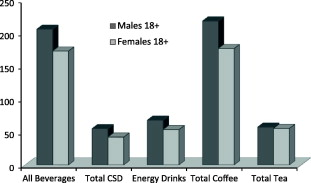

*Mean caffeine intake (mg/day) by gender for consumers of total caffeinated beverages and each respective beverage category for consumers only.*

According to statista, Starbucks is responsible for 40% of the US coffee market share, with over 15,000 US locations (33,000 globally) [3]. America might "run on Dunkin'" but the market share data demonstrates Starbucks supremacy.

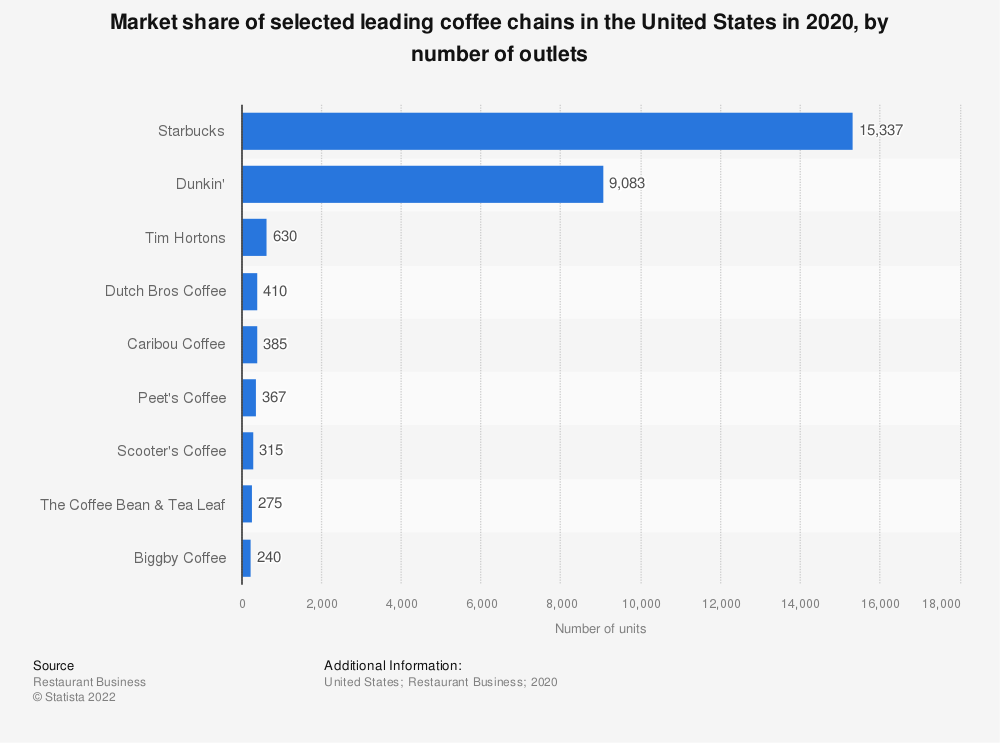

One commonality that busy workers and stressed college students share, other than their affinity for coffee, is a lack of time to consider the not-readily-available nutrition facts about their preffered beverages. What makes the drinks so tasty is sugar, and lots of it. Our digestive system breaks down sugar into glucose, and whatever we don't burn off through physical activity will then be stored on the body as fat. Sugar is also calorie-dense, and there have been many studies showing that there is a significant association between sugar-sweetened beverages and obesity [4].

While there could be a connection between increased obesity rates and sustained coffee consumption, we won't draw any conclusions in that regard here. However, it may be beneficial to visualize just exactly what you are drinking when you fly through the Starbucks drive-through.


[1] https://www.cdc.gov/obesity/data/adult.html

[2] https://pubmed.ncbi.nlm.nih.gov/24189158/

[3] https://www.statista.com/statistics/250166/market-share-of-major-us-coffee-shops/

[4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5836186/

#### 1.2 Purpose<a id='1.2'></a>

Using data publicly available from Kaggle [5], we will endeavour to better understand the features of the drinks that Starbucks offers.

The specific question we want to resolve is this:<br>
****Are there any Starbucks drinks available to choose from that have enough caffeine to get you focused, with low enough sugar to keep you from getting fat?****


[5] https://www.kaggle.com/datasets/starbucks/starbucks-menu?resource=download&select=starbucks_drinkMenu_expanded.csv

#### 2.0 Data Overview<a id='2.0'></a>

Import modules

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Starbucks'

In [4]:
df = pd.read_csv(file+r'\starbucks_drinkMenu_expanded.csv')

In [5]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

Already, we can see that columns that should be numeric are sometimes not ('object')

#### 2.1 Missing values<a id='2.1'></a>

There appears to be a missing value for caffeine, based on the df.info() non-null count.

In [7]:
null = df[df['Caffeine (mg)'].isnull()].index.tolist()
null

[158]

We will inspect this index and its surrounding entries for context

In [8]:
df.iloc[null[0]-4:null[0]+4]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
154,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Tall,60,0,0.0,0.0,0,4,15,0,15,0.2,0%,0%,0%,0%,120
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,90,0.1,0.0,0.0,0,5,21,0,21,0.3,0%,0%,0%,0%,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0%,0%,0%,0%,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4%,0%,8%,2%,90
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,4%,0%,8%,0%,125


Thankfully this is a probable entry error, and the missing value is obviously 90. Though we have uncovered a potential issue with 'Beverage_prep' labeling (to be solved later).

In [9]:
df['Caffeine (mg)'].fillna(value=90, inplace=True)
df.iloc[158,-1]

90

Now we can set to eliminating non-numeric values in otherwise numeric columns.

First we can drop the vitamins/minerals columns, as well the fat subcategories.

In [10]:
df.drop(df.columns[[5,6,13,14,15,16]], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5    Sodium (mg)               242 non-null    int64  
 6    Total Carbohydrates (g)   242 non-null    int64  
 7   Cholesterol (mg)           242 non-null    int64  
 8    Dietary Fibre (g)         242 non-null    int64  
 9    Sugars (g)                242 non-null    int64  
 10   Protein (g)               242 non-null    float64
 11  Caffeine (mg)              242 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 22.8+ KB


Now we are left with columns 4 and 11 to make numeric.

In [12]:
df2 = df.iloc[:,[4,11]].apply(pd.to_numeric, errors='coerce',result_type='broadcast')


In [13]:
df.iloc[:,4] = df2.iloc[:,0]
df.iloc[:,11] = df2.iloc[:,1]

In [14]:
df.isna().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                1
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Caffeine (mg)                22
dtype: int64

Now that the non-numeric values are NaN in our dataframe, we can drop those rows.

In [15]:
df = df.dropna(axis = 0)

In [16]:
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Caffeine (mg)                0
dtype: int64

In [17]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'])
df[' Total Fat (g)'] = pd.to_numeric(df[' Total Fat (g)'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          219 non-null    object 
 1   Beverage                   219 non-null    object 
 2   Beverage_prep              219 non-null    object 
 3   Calories                   219 non-null    int64  
 4    Total Fat (g)             219 non-null    float64
 5    Sodium (mg)               219 non-null    int64  
 6    Total Carbohydrates (g)   219 non-null    int64  
 7   Cholesterol (mg)           219 non-null    int64  
 8    Dietary Fibre (g)         219 non-null    int64  
 9    Sugars (g)                219 non-null    int64  
 10   Protein (g)               219 non-null    float64
 11  Caffeine (mg)              219 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 22.2+ KB


#### 2.2 Visualizing raw data<a id='2.2'></a>

Now we can start to get an idea of how the data is distributed.

The variables that we are most interested in are caffeine and sugar.

###### Sugar

Text(0, 0.5, 'Frequency')

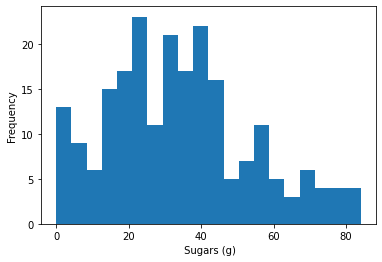

In [19]:
plt.hist(df[' Sugars (g)'], bins=20)
plt.xlabel(df.columns[9])
plt.ylabel("Frequency")

According to the FDA, the guideline for a typical diet of 2,000 calories per day, is no more than 50 g of added sugars [6]. Many of these Starbucks drink options easily exceed that.

[6] https://www.fda.gov/food/new-nutrition-facts-label/added-sugars-new-nutrition-facts-label

However, there seem to be many options at the very low end of the range, with some drinks containing near-zero sugar.

###### Caffeine

Text(0, 0.5, 'Frequency')

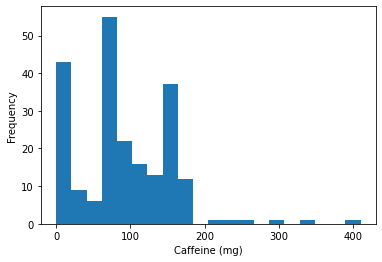

In [20]:
plt.hist(df['Caffeine (mg)'], bins=20)
plt.xlabel(df.columns[11])
plt.ylabel("Frequency")

There are some very highly caffeinated menu options available. But of interest is the obvious 3-peak histogram. What is the reason for a trimodal distribution? We can think back to our process for replacing the missing caffeine value earlier for the answer.

In [21]:
df['Beverage_prep'].value_counts()

Soymilk               61
2% Milk               46
Grande Nonfat Milk    24
Tall Nonfat Milk      22
Venti Nonfat Milk     21
Whole Milk            16
Short Nonfat Milk     11
Tall                   5
Grande                 4
Venti                  4
Short                  3
Solo                   1
Doppio                 1
Name: Beverage_prep, dtype: int64

The culprit of the trimodal plot is the fact that there are 3 different milk options for each Beverage: Nonfat Milk, 2% Milk, and Soymilk. There are also size options for many beverages: Short, Tall, Grande, and Venti.<br>
*Logically, the larger the drink, the more caffeine/sugar it will contain.*

#### 2.3 Selecting from label options<a id='2.3'></a>

In order to make a general compariason, we will need to select one milk and one drink size for each Beverage. The way in which the data was compiled makes using nonfat milk easiest.

The Grande is a 16 oz drink equivalent to a medium, and is considered the standard, so we will proceed using the 24 Grande-sized nonfat milk options.

In [22]:
gnf = df[df['Beverage_prep'] == "Grande Nonfat Milk"]
gnf.describe()

,Calories,Total Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000
mean,209.166667,1.116667,3.541667,165.416667,42.708333,1.00000,39.125000,8.416667,89.791667
std,70.889790,1.564738,3.451265,58.121250,15.702338,1.86501,14.748065,4.799607,56.250201
min,80.000000,0.100000,0.000000,30.000000,12.000000,0.00000,10.000000,2.000000,0.000000
25%,150.000000,0.175000,0.000000,125.000000,32.500000,0.00000,30.750000,4.000000,58.750000
50%,220.000000,0.300000,5.000000,160.000000,44.000000,0.00000,38.000000,7.500000,95.000000
75%,260.000000,1.000000,5.000000,212.500000,56.250000,1.25000,52.750000,13.000000,150.000000
max,350.000000,6.000000,10.000000,250.000000,67.000000,7.00000,62.000000,16.000000,175.000000


#### 2.4 Correlations<a id='2.4'></a>

<ipython-input-23-c652acb02cc4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gnf.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));


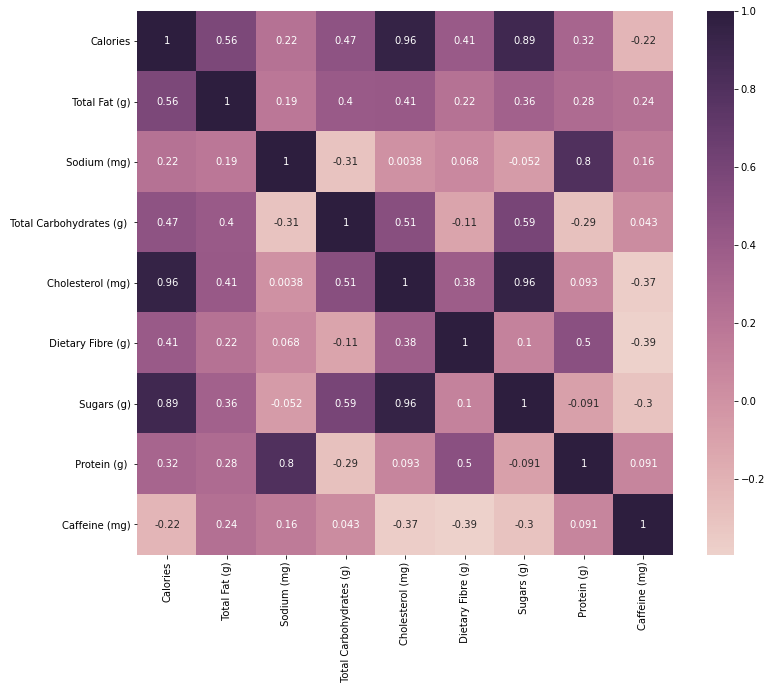

In [23]:
plt.subplots(figsize=(12,10))
sns.heatmap(gnf.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

We see highly positive correlation between Calories, Sugar, and Cholesterol.
This is intuitive, as sugars are calorie-dense macronutrients.

Sugar and Total Carbohydrates have a correlation coefficient of 0.59, which is actually lower than expected, given that sugars are carbohydrates.

Interestingly, Protein and Sodium are have a correlation coefficient of 0.80.

Not to state the obvious, but the most important realization here is that **you don't need sugar to have caffeine.**

Sugar does not correlate highly with caffeine. <br>
In fact, with a correlation coefficient of -0.30, the *more sugar in your Starbucks drink, the less caffeine you can expect!*

#### 2.5 Plotting the focus variables<a id='2.5'></a>

###### Sugar vs Caffeine

<AxesSubplot:xlabel='Caffeine (mg)', ylabel=' Sugars (g)'>

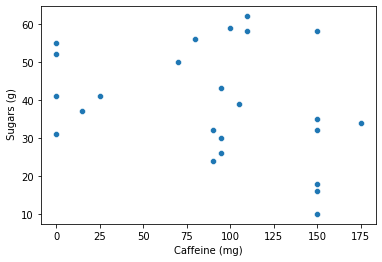

In [24]:
sns.scatterplot(data=gnf,x='Caffeine (mg)',y=' Sugars (g)',markers='Beverage')

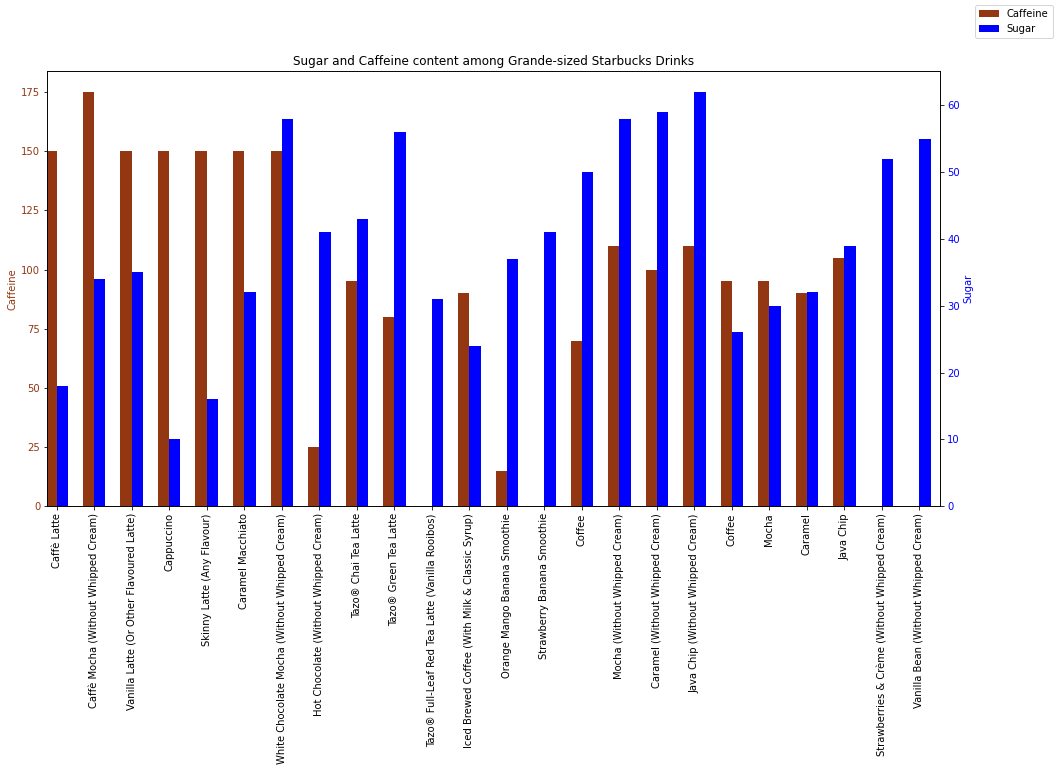

In [25]:
fig = plt.figure(figsize =(16, 8))
ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

gnf['Caffeine (mg)'].plot(kind='bar', color='#923712', ax=ax, width=width, position=1,label="Caffeine")
gnf[' Sugars (g)'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0,label="Sugar")

ax.set_ylabel('Caffeine')
ax.yaxis.label.set_color('#923712')
ax.tick_params(axis='y', labelcolor='#923712')
ax2.set_ylabel('Sugar')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax.set_xticklabels(gnf['Beverage'])
ax.margins(x=0.5)
plt.title("Sugar and Caffeine content among Grande-sized Starbucks Drinks")
fig.legend()
plt.show()

Looking at this data, we can clearly see that Starbucks customers can choose a drinks with any combination of caffeine and sugar. Some drinks are high in both, some are lower in both, some are high sugar - low caffeine, and some are low sugar - high caffeine. It is the latter category which we would point obesity-averse "coffee people" toward.

For example, there are seven drinks in this cohort which contain 150 or more mg of caffeine. Among those, the sugar quantity ranges from ~10 to ~60 grams.

At ~150 mg of caffeine, the "White Chocolate Mocha" sounds delicious, but its 60 grams of sugar should stifle your excitement.<br>
On the other hand, **the classic "Cappuccino" has just as much caffeine, with one sixth of the sugar.**

A major problem is that most of the choices offered have way too much sugar. In fact, *some have lots of sugar and no caffeine whatsoever.*

In [26]:
sugary = gnf[gnf[' Sugars (g)']>25][' Sugars (g)'].count()
sugaryP = 100*sugary/len(gnf)

In [27]:
print("There are {} drinks in this subset of 24 medium-sized drinks \nwhich have a sugar amount greater than half of the recommended daily intake.\nThis accounts for {} percent of the drinks on this subset.".format(sugary,round(sugaryP,2)))

There are 20 drinks in this subset of 24 medium-sized drinks 
which have a sugar amount greater than half of the recommended daily intake.
This accounts for 83.33 percent of the drinks on this subset.


#### 3.0 Recommendations<a id='3.0'></a>

Make new columns in the original dataframe:

* Whether sugar amount is over half of the recommended daily intake (binary)
* Number of ounces in each drink
* Whether caffeine amount is over 100 mg

In [28]:
df["over_50p_sugar"] = np.where(df[' Sugars (g)']>25,1,0)
df["oz"] = np.where(df["Beverage_prep"].str.contains("Short"),8,
                    np.where(df["Beverage_prep"].str.contains("Tall"),12,
                    np.where(df["Beverage_prep"].str.contains("Grande"),16,
                    np.where(df["Beverage_prep"].str.contains("Venti"),20,0
                   ))))
df["over100mg"] = np.where(df['Caffeine (mg)']>100,1,0)

Make a new dataframe using only drinks that have ounces listed.

In [29]:
df3 = df[df["oz"]>0]

Count the number of drinks over/under 100 mg of caffeine.

In [30]:
df3.over100mg.value_counts()

0    55
1    39
Name: over100mg, dtype: int64

Make a new column for "good" drinks for health-conscious coffee addicts.

In [31]:
df3['hcls'] = np.where((df3['over100mg']==1) & (df3['over_50p_sugar']==0),1,0)

<ipython-input-31-faccc119a754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['hcls'] = np.where((df3['over100mg']==1) & (df3['over_50p_sugar']==0),1,0)


In [32]:
rec = df3[df3['hcls']==1]

****List of drinks that contain at least 100 mg of caffeine and less than 25 g of sugar (half of the 50 g limit suggested by the FDA)****

In [33]:
rec

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),over_50p_sugar,oz,over100mg,hcls
0,Coffee,Brewed Coffee,Short,3,0.1,0,5,0,0,0,0.3,175.0,0,8,1,1
1,Coffee,Brewed Coffee,Tall,4,0.1,0,10,0,0,0,0.5,260.0,0,12,1,1
2,Coffee,Brewed Coffee,Grande,5,0.1,0,10,0,0,0,1.0,330.0,0,16,1,1
3,Coffee,Brewed Coffee,Venti,5,0.1,0,10,0,0,0,1.0,410.0,0,20,1,1
10,Classic Espresso Drinks,Caffè Latte,Grande Nonfat Milk,130,0.3,5,150,19,0,18,13.0,150.0,0,16,1,1
13,Classic Espresso Drinks,Caffè Latte,Venti Nonfat Milk,170,0.4,10,190,25,0,23,16.0,150.0,0,20,1,1
41,Classic Espresso Drinks,Caffè Americano,Tall,10,0.0,0,10,2,0,0,1.0,150.0,0,12,1,1
42,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0,0,15,3,0,0,1.0,225.0,0,16,1,1
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0,15,4,0,0,1.0,300.0,0,20,1,1
50,Classic Espresso Drinks,Cappuccino,Grande Nonfat Milk,80,0.2,5,90,12,0,10,8.0,150.0,0,16,1,1


#### 3.1 Final recommendation list by drink type:<a id='3.1'></a>

In [34]:
list(rec['Beverage'].unique())

['Brewed Coffee',
 'Caffè Latte',
 'Caffè Americano',
 'Cappuccino',
 'Skinny Latte (Any Flavour)',
 'Iced Brewed Coffee (With Classic Syrup)',
 'Shaken Iced Tazo® Tea (With Classic Syrup)']

**If you are a Starbucks customer who wants to avoid obesity while catering to your caffeine addiction, just remember this list of acceptable drinks!**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cappuccino_at_Sightglass_Coffee.jpg/1280px-Cappuccino_at_Sightglass_Coffee.jpg" alt="Alternative text" />